<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# UMAP

https://umap-learn.readthedocs.io/en/latest/

https://pair-code.github.io/understanding-umap/

## 0. Installation

```
pip install umap-learn
```

## 1. Load data

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target_names.shape

(10,)

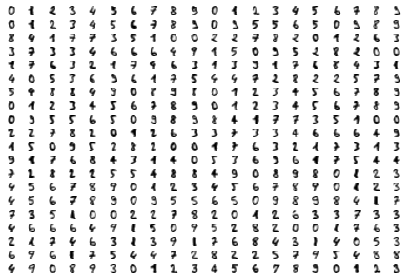

In [7]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

## 2. Algorithm

### 2.1 Training

In [8]:
import umap

reducer = umap.UMAP(random_state=42, 
                    n_neighbors=15, 
                    min_dist=0.1,
                    n_components=2,
                    metric='euclidean')
reducer.fit(digits.data)

UMAP(random_state=42)

### 2.2 Embedding

In [9]:
embedding = reducer.transform(digits.data)

embedding

array([[14.601268  ,  2.9215922 ],
       [ 0.29476652, 11.487288  ],
       [ 2.7827795 ,  7.969271  ],
       ...,
       [-1.3782585 ,  9.421044  ],
       [-5.923414  ,  4.6751275 ],
       [-1.7677889 ,  9.0535555 ]], dtype=float32)

In [10]:
embedding.shape

(1797, 2)

### 2.3 Results

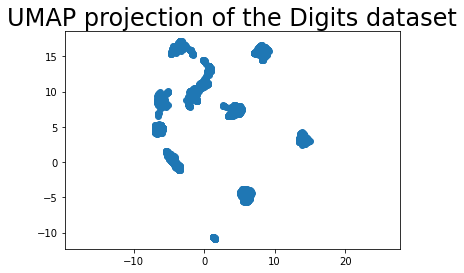

In [11]:
import numpy as np

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Digits dataset', fontsize=24);

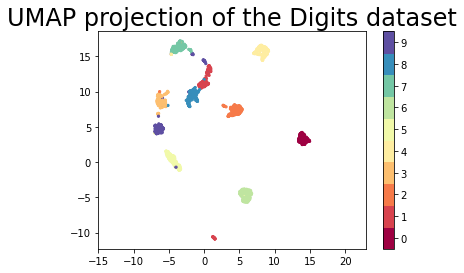

In [12]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

### 2.4 Hyperparameters

https://umap-learn.readthedocs.io/en/latest/parameters.html

- n_neighbors: balances local versus global structure in the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure
- min_dist: controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation. A low value is ideal for clustering purposes
- n_components: the dimensionality of the reduced dimension space we will be embedding the data into
- metric: how distance is computed in the input data space (euclidean, cosine, chebyshev...)

## 3. UMAP vs other techniques

https://umap-learn.readthedocs.io/en/latest/faq.html#what-is-the-difference-between-umap-vaes-pca

https://umap-learn.readthedocs.io/en/latest/benchmarking.html

## 4. UMAP - Clustering guided lesson

https://umap-learn.readthedocs.io/en/latest/clustering.html

Guideline for a typical clustering pipeline: 

- Data is a high-dimensional embedding (300+) 
- PCA to reduce to ~50 dimensions 
- UMAP to reduce to 2 dimensions
- HDBSCAN/DBSCAN for clustering

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>